In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("pandas version:", pd.__version__)
#print("matplotlib.pyplot version:", plt.__version__)
print("seaborn version:", sns.__version__)

pandas version: 2.3.2
seaborn version: 0.13.2


This data is gathered from this website: https://www.rijdendetreinen.nl/en/open-data/train-archive

### Data Dictionary

Below you will find the data dictionary provided by Rijden-de-treinen.

Each row in these files represent a stop at a station. Each service at least departs from and arrives at a station (i.e. two rows). For each stop, you can find the name of the station, the arrival and departure time, delays and cancellations. The exact meaning of each column is explained below.

The source for this data is the real-time data from NS with live departure times, live arrival times and service updates. This data is also used in the app and website of Rijden Treinen.

#### Columns
- `Service:RDT-ID` *Unique identifier (service):* This is the ID that Rijden de Treinen uses for this service. It has no useful meaning beyond uniquely identifying a single service on a single date. This ID will occur more than once in the CSV files because this ID is unique for each service. There is also a column Stop:RDT-ID with a unique ID for each stop.
- `Service:Date` *Service date (schedule date):* The scheduled service date for this service. The service date is not always the same as the actual date. For example, a service that departs at 23:59 on 31 July and arrives at 02:00 on 1 August has a service date of 31 July. Delays do not affect the service date.
- `Service:Type` *Service type:* The service type, for example: *Intercity*, *Sprinter* or *ICE International*.
- `Service:Company` *Operator:* Company operating this service, like NS or Arriva.
- `Service:Train number` *Train number:* The train number (service number) for this service uniquely identifies this service on this date. This number is sometimes also communicated to passengers (especially for international trains). A single service may sometimes have multiple train numbers. For example, when a train is split in two parts, or when a train changes a train number on a major station halfway.
- `Service:Completely cancelled` *Service is fully cancelled:* This column is true when all stops of this service have been cancelled. Or in other words: when the train does not run at all.
- `Service:Partly cancelled` *Partially cancelled:* This column is true when one or more stops of this service have been cancelled. Or in other words: when the train does not run on a part of the route.
- `Service:Maximum delay` *Highest delay for this service:* The highest delay (**in minutes**) of all stops of this service.
- `Stop:RDT-ID` *Unique identifier (stop):* Unique identifier for this stop. This ID is unique for each stop in the dataset. It has no further useful meaning.
- `Stop:Station code` *Station code:* Code (abbreviation) of the station name. See also the [dataset with railway stations.](https://www.rijdendetreinen.nl/en/open-data/stations)
- `Stop:Station name` *Station name:* The name of the station.
- `Stop:Arrival time` *Arrival time:* Scheduled arrival time in **RFC 3339 format.** This column is empty when no arrival was scheduled.
- `Stop:Arrival delay` *Arrival delay:* Arrival delay **in minutes.** This column is empty when no arrival was scheduled.
- `Stop:Arrival cancelled` *Cancelled arrival:* This column is true when the arrival at this stop has been cancelled. This column is empty when no arrival was scheduled.
- `Stop:Departure time` *Departure time:* Scheduled departure time in **RFC 3339 format.** This column is empty when no departure was scheduled.
- `Stop:Departure delay` *Departure delay:* Departure delay **in minutes.** This column is empty when no departure was scheduled.
- `Stop:Departure cancelled` *Cancelled departure:* This column is true when the departure at this stop has been cancelled. This column is empty when no departure was scheduled.
- `Stop:Platform change` *Platform change:* This column is true when the platform of this stop has changed from the planned platform.
- `Stop:Planned platform` *Scheduled platform:* The originally scheduled platform for this service.
- `Stop:Actual platform` *Actual platform:* The platform that was actually used for this service.

In [3]:
df = pd.read_parquet('Data/version_3_traject_Eindhoven_sittard_2019_2025.parquet')
df.head()

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,Stop:Arrival time,Stop:Arrival delay,Stop:Arrival cancelled,Stop:Departure time,Stop:Departure delay,Stop:Departure cancelled,Stop:Platform change,Stop:Planned platform,Stop:Actual platform,sort_time
0,738846,2019-01-01,Intercity,NS,2925,False,False,5,6220367,EKZ,...,NaT,NaN,None,2019-01-01 05:39:00+00:00,0.0,False,False,1,1,2019-01-01 05:39:00+00:00
1,738846,2019-01-01,Intercity,NS,2925,False,False,0,6220388,BKF,...,2019-01-01 05:43:00+00:00,0.0,False,2019-01-01 05:43:00+00:00,0.0,False,False,1,1,2019-01-01 05:43:00+00:00
2,738846,2019-01-01,Intercity,NS,2925,False,False,0,6220405,BKG,...,2019-01-01 05:45:00+00:00,0.0,False,2019-01-01 05:47:00+00:00,0.0,False,False,2,2,2019-01-01 05:45:00+00:00
3,738846,2019-01-01,Intercity,NS,2925,False,False,0,6220435,HKS,...,2019-01-01 05:52:00+00:00,0.0,False,2019-01-01 05:52:00+00:00,0.0,False,False,2,2,2019-01-01 05:52:00+00:00
4,738846,2019-01-01,Intercity,NS,2925,False,False,0,6220479,HNK,...,2019-01-01 05:58:00+00:00,1.0,False,2019-01-01 05:59:00+00:00,0.0,False,False,1,1,2019-01-01 05:58:00+00:00


In [5]:
df["departure_time"] = pd.to_datetime(df["Stop:Departure time"], errors="coerce")

df[["Stop:Departure time", "departure_time"]]

,Stop:Departure time,departure_time
0,2019-01-01 05:39:00+00:00,2019-01-01 05:39:00+00:00
1,2019-01-01 05:43:00+00:00,2019-01-01 05:43:00+00:00
2,2019-01-01 05:47:00+00:00,2019-01-01 05:47:00+00:00
3,2019-01-01 05:52:00+00:00,2019-01-01 05:52:00+00:00
4,2019-01-01 05:59:00+00:00,2019-01-01 05:59:00+00:00
...,...,...
2855490,2025-08-31 14:59:00+00:00,2025-08-31 14:59:00+00:00
2855491,2025-08-31 15:16:00+00:00,2025-08-31 15:16:00+00:00
2855492,2025-08-31 15:30:00+00:00,2025-08-31 15:30:00+00:00
2855493,2025-08-31 15:46:00+00:00,2025-08-31 15:46:00+00:00


In [7]:
df["hour"] = df["departure_time"].dt.hour
df["day_of_week"] = df["departure_time"].dt.dayofweek
df["month"] = df["departure_time"].dt.month
df["is_weekend"] = df["day_of_week"].isin([5,6]).astype(int)
df["is_rushhour"] = df["hour"].isin([7,8,9,16,17,18]).astype(int)

df[["hour", "day_of_week", "month", "is_weekend", "is_rushhour"]]

,hour,day_of_week,month,is_weekend,is_rushhour
0,5.0,1.0,1.0,0,0
1,5.0,1.0,1.0,0,0
2,5.0,1.0,1.0,0,0
3,5.0,1.0,1.0,0,0
4,5.0,1.0,1.0,0,0
...,...,...,...,...,...
2855490,14.0,6.0,8.0,1,0
2855491,15.0,6.0,8.0,1,0
2855492,15.0,6.0,8.0,1,0
2855493,15.0,6.0,8.0,1,0


In [9]:
df[["hour", "day_of_week", "month", "is_weekend", "is_rushhour"]].describe()

,hour,day_of_week,month,is_weekend,is_rushhour
count,2.664989e+06,2.664989e+06,2.664989e+06,2.855495e+06,2.855495e+06
mean,1.278399e+01,2.588169e+00,6.254520e+00,1.748408e-01,3.355303e-01
std,4.717191e+00,1.875907e+00,3.464121e+00,3.798309e-01,4.721756e-01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,9.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.300000e+01,2.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,4.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,2.300000e+01,6.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00


In [11]:
df["number_of_stops"] = df.groupby("Service:RDT-ID")["Stop:Station code"].transform("count")
df["platform_change"] = df["Stop:Platform change"].astype(int)
df["partly_cancelled"] = df["Service:Partly cancelled"].astype(int)
df["completely_cancelled"] = df["Service:Completely cancelled"].astype(int)

df[["number_of_stops", "platform_change", "partly_cancelled", "completely_cancelled"]]

,number_of_stops,platform_change,partly_cancelled,completely_cancelled
0,16,0,0,0
1,16,0,0,0
2,16,0,0,0
3,16,0,0,0
4,16,0,0,0
...,...,...,...,...
2855490,17,0,1,1
2855491,17,0,1,1
2855492,17,0,1,1
2855493,17,0,1,1


In [13]:
df[["number_of_stops", "platform_change", "partly_cancelled", "completely_cancelled"]].describe()

,number_of_stops,platform_change,partly_cancelled,completely_cancelled
count,2.855495e+06,2.855495e+06,2.855495e+06,2.855495e+06
mean,1.516513e+01,3.547511e-02,2.047424e-01,1.239470e-02
std,1.582726e+00,1.849774e-01,4.035134e-01,1.106394e-01
min,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00
max,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00


In [15]:
df["departure_delay_start"] = df.groupby("Service:RDT-ID")["Stop:Departure delay"].transform("first")
df["arrival_delay_previous"] = df.groupby("Service:RDT-ID")["Stop:Arrival delay"].shift(1)
df["max_delay_so_far"] = df.groupby("Service:RDT-ID")["Stop:Departure delay"].cummax()

df[["departure_delay_start", "arrival_delay_previous", "max_delay_so_far"]].sample(10)

,departure_delay_start,arrival_delay_previous,max_delay_so_far
456988,0.0,NaN,0.0
1746345,0.0,0.0,0.0
60729,0.0,8.0,10.0
247425,0.0,0.0,1.0
989609,0.0,0.0,0.0
372658,0.0,0.0,2.0
669899,0.0,0.0,1.0
1051272,1.0,0.0,1.0
789653,0.0,NaN,0.0
2767466,0.0,0.0,0.0


In [17]:
df["arrival_time"] = pd.to_datetime(df["Stop:Arrival time"], errors="coerce")
df["planned_dwell_time"] = (df["departure_time"] - df["arrival_time"]).dt.total_seconds() / 60

prev_dep = df.groupby("Service:RDT-ID")["Stop:Departure time"].shift(1)
df["planned_travel_time_per_station"] = (
    (df["Stop:Arrival time"] - prev_dep)
    .dt.total_seconds() / 60
)

df[["arrival_time", "departure_time", "planned_dwell_time", "planned_travel_time_per_station"]].sample(10)

,arrival_time,departure_time,planned_dwell_time,planned_travel_time_per_station
370576,NaT,2019-11-02 11:19:00+00:00,NaN,NaN
1431247,2022-04-01 11:43:00+00:00,2022-04-01 11:43:00+00:00,0.0,8.0
978584,2021-03-08 17:55:00+00:00,2021-03-08 17:59:00+00:00,4.0,8.0
1872279,2023-07-24 08:32:00+00:00,2023-07-24 08:36:00+00:00,4.0,16.0
1863327,2023-07-06 06:12:00+00:00,2023-07-06 06:12:00+00:00,0.0,7.0
2191354,2024-03-25 09:39:00+00:00,2024-03-25 09:40:00+00:00,1.0,13.0
2141239,NaT,2024-02-08 16:31:00+00:00,NaN,NaN
2736782,2025-06-05 08:02:00+00:00,2025-06-05 08:05:00+00:00,3.0,6.0
912389,2020-12-02 11:33:00+00:00,NaT,NaN,9.0
168810,NaT,2019-05-16 04:01:00+00:00,NaN,NaN


In [19]:
df["is_delayed"] = (df["Service:Maximum delay"] >= 5).astype(int)

df.sample(10)

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,platform_change,partly_cancelled,completely_cancelled,departure_delay_start,arrival_delay_previous,max_delay_so_far,arrival_time,planned_dwell_time,planned_travel_time_per_station,is_delayed
1620618,10104440,2022-11-18,Intercity,NS,2981,False,False,0,90625832,BKF,...,0,0,0,0.0,NaN,0.0,2022-11-18 19:43:00+00:00,0.0,4.0,0
848748,5151437,2020-10-28,Intercity,NS,826,False,False,2,45391459,MT,...,0,0,0,2.0,NaN,2.0,NaT,NaN,NaN,0
1772587,11026044,2023-04-18,Intercity,NS,844,False,False,0,99228471,AMR,...,0,0,0,0.0,3.0,NaN,2023-04-18 13:03:00+00:00,NaN,9.0,0
1696551,10590862,2023-02-07,Intercity,NS,3960,False,True,0,95187911,WT,...,0,1,0,27.0,25.0,27.0,2023-02-07 15:34:00+00:00,0.0,14.0,0
2716155,16008528,2025-05-20,Intercity,NS,3923,False,False,0,144657376,EHV,...,0,0,0,0.0,0.0,1.0,2025-05-20 06:33:00+00:00,5.0,18.0,0
1022580,6379010,2021-05-14,Intercity,NS,840,False,False,0,56930994,ZD,...,0,0,0,0.0,0.0,0.0,2021-05-14 11:42:00+00:00,0.0,7.0,0
787642,4808424,2020-09-07,Intercity,NS,857,False,False,0,42295108,MT,...,0,0,0,0.0,0.0,NaN,2020-09-07 16:00:00+00:00,NaN,14.0,0
1540457,9099020,2022-06-29,Intercity,NS,828,False,False,0,81939818,STD,...,0,0,0,0.0,NaN,0.0,2022-06-29 06:16:00+00:00,1.0,15.0,0
1860292,11514483,2023-07-04,Intercity,NS,828,False,False,0,103676163,STD,...,0,0,0,0.0,NaN,0.0,2023-07-04 06:16:00+00:00,1.0,15.0,0
746795,4385890,2020-07-11,Intercity,NS,851,False,False,0,38744998,HT,...,0,0,0,0.0,0.0,0.0,2020-07-11 13:01:00+00:00,5.0,28.0,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2855495 entries, 0 to 2855494
Data columns (total 38 columns):
 #   Column                           Dtype              
---  ------                           -----              
 0   Service:RDT-ID                   int64              
 1   Service:Date                     object             
 2   Service:Type                     object             
 3   Service:Company                  object             
 4   Service:Train number             int64              
 5   Service:Completely cancelled     bool               
 6   Service:Partly cancelled         bool               
 7   Service:Maximum delay            int64              
 8   Stop:RDT-ID                      int64              
 9   Stop:Station code                object             
 10  Stop:Station name                object             
 11  Stop:Arrival time                datetime64[ns, UTC]
 12  Stop:Arrival delay               float64            
 13  Stop:Arrival

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

y = df["is_delayed"]

X = df[[
    "hour",
    "day_of_week",
    "month",
    "is_weekend",
    "is_rushhour",
    "number_of_stops",
    "platform_change",
    "partly_cancelled",
    "completely_cancelled",
    "departure_delay_start",
    "arrival_delay_previous",
    "max_delay_so_far",
    "planned_travel_time_per_station",
    "planned_dwell_time"
]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
model = RandomForestClassifier(
    class_weight="balanced"
)

model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    563118
           1       0.21      0.88      0.34      7981

    accuracy                           0.95    571099
   macro avg       0.60      0.91      0.66    571099
weighted avg       0.99      0.95      0.97    571099

[[536420  26698]
 [   981   7000]]


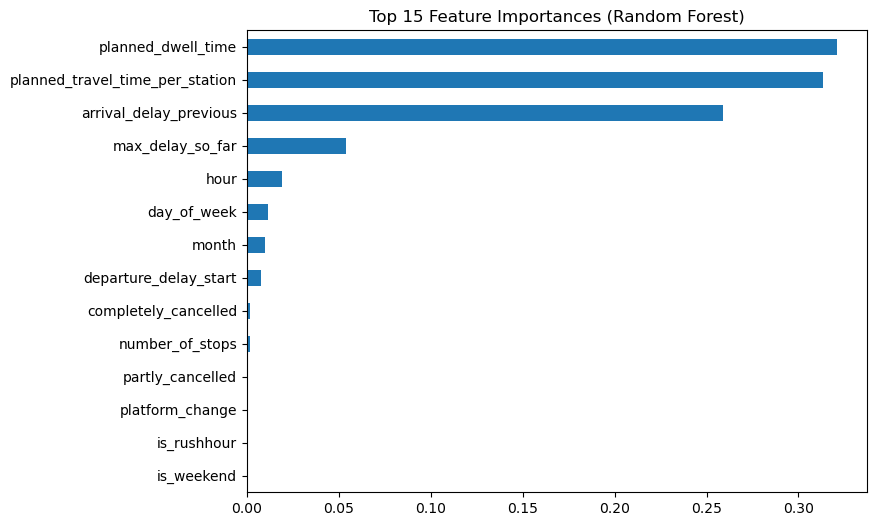

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().tail(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

In [31]:
df[["planned_dwell_time", "planned_travel_time_per_station", "is_delayed"]].sample(20)

,planned_dwell_time,planned_travel_time_per_station,is_delayed
1870816,NaN,NaN,1
792501,0.0,25.0,0
2528727,0.0,2.0,0
2775310,NaN,NaN,0
2592227,1.0,6.0,0
2220913,6.0,17.0,0
2519632,2.0,4.0,0
754643,1.0,15.0,0
1594574,1.0,6.0,0
154234,3.0,18.0,0


In [33]:
print(df["is_delayed"].value_counts())

is_delayed
0    2815589
1      39906
Name: count, dtype: int64


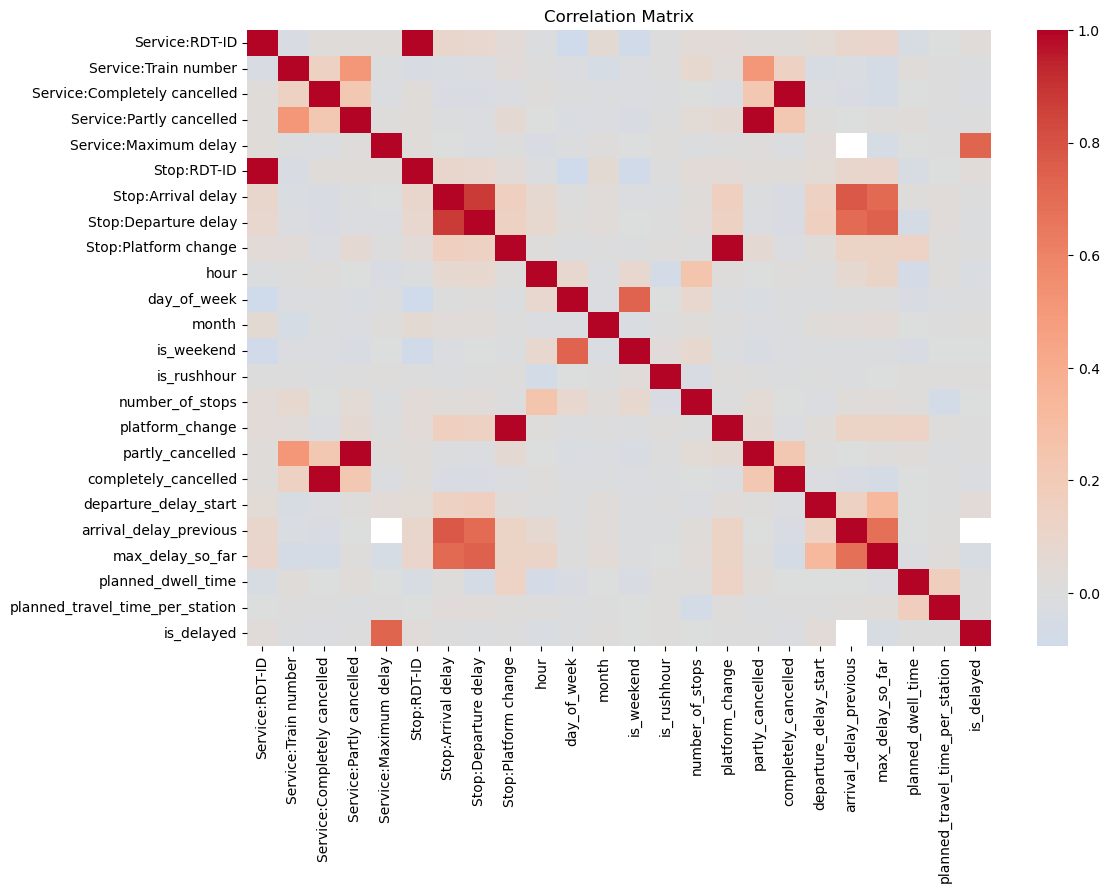

In [35]:
# Alleen numerieke kolommen pakken
corr = df.corr(numeric_only=True)

# Heatmap tekenen
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix")
plt.show()

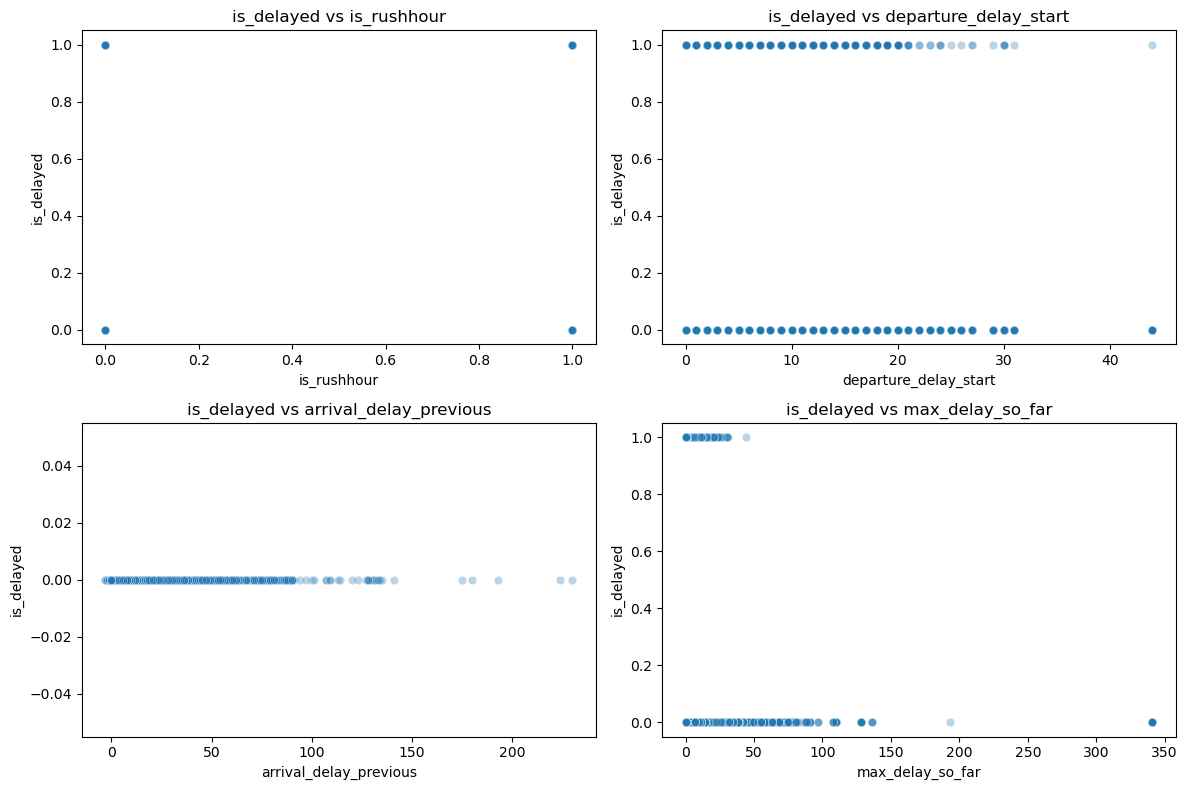

In [37]:
features_plot = ["is_rushhour", "departure_delay_start", "arrival_delay_previous", "max_delay_so_far"]

plt.figure(figsize=(12,8))
for i, feature in enumerate(features_plot, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        data=df,
        x=feature,
        y="is_delayed",
        alpha=0.3
    )
    plt.title(f"is_delayed vs {feature}")
plt.tight_layout()
plt.show()

I wanted to look at some features that I thought would be pretty descriptive of a delay happening but didnt endup contributing to the prediction.

I especially took an interest in the departure_delay_start graph in the top right.

I expect that if a train would be starting with delay, it would have delay. But there are some trains that didn't endup getting the delayed label, but did have a 44 minute delay_start. I wanted to check this.

In [39]:
df["departure_delay_start"].unique()

array([ 0.,  3.,  1.,  2.,  5., 12.,  6.,  7., 30.,  4.,  8., 15., 14.,
       16., 13., 10.,  9., 18., 11., 31., 29., 19., 20., 22., 23., 17.,
       27., 21., 26., 24., 44., 25.])

In [41]:
df[df["departure_delay_start"] == 44]

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,platform_change,partly_cancelled,completely_cancelled,departure_delay_start,arrival_delay_previous,max_delay_so_far,arrival_time,planned_dwell_time,planned_travel_time_per_station,is_delayed
2029224,12447087,2023-11-24,Intercity,NS,2978,False,True,53,112114499,MT,...,1,1,0,44.0,NaN,44.0,NaT,NaN,NaN,1
2029225,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114500,STD,...,1,1,0,44.0,NaN,49.0,2023-11-24 19:46:00+00:00,1.0,15.0,0
2029226,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114501,RM,...,0,1,0,44.0,47.0,49.0,2023-11-24 20:01:00+00:00,1.0,14.0,0
2029227,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114502,WT,...,0,1,0,44.0,48.0,49.0,2023-11-24 20:16:00+00:00,0.0,14.0,0
2029228,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114503,EHV,...,1,1,0,44.0,49.0,49.0,2023-11-24 20:32:00+00:00,2.0,16.0,0
2029229,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114504,HT,...,0,1,0,44.0,53.0,49.0,2023-11-24 20:52:00+00:00,1.0,18.0,0
2029230,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114505,UT,...,0,1,0,44.0,0.0,49.0,2023-11-24 21:19:00+00:00,3.0,26.0,0
2029231,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114506,ASB,...,0,1,0,44.0,0.0,49.0,2023-11-24 21:38:00+00:00,0.0,16.0,0
2029232,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114507,ASA,...,0,1,0,44.0,0.0,49.0,2023-11-24 21:43:00+00:00,0.0,5.0,0
2029233,12447087,2023-11-24,Intercity,NS,2978,False,True,0,112114508,ASD,...,0,1,0,44.0,0.0,49.0,2023-11-24 21:51:00+00:00,2.0,8.0,0


We see that the one with 44 minutes of start_delay is all the same service. So I want to check what exactly is happening during the entire route.

We also see that this service is **partially cancelled**.

In [43]:
example_id = 12447087
df[df["Service:RDT-ID"] == example_id][[
    "Service:RDT-ID", "Stop:Station code", "Stop:Arrival time", "Stop:Departure time", "Stop:Arrival delay", "Stop:Departure delay"
]]

,Service:RDT-ID,Stop:Station code,Stop:Arrival time,Stop:Departure time,Stop:Arrival delay,Stop:Departure delay
2029224,12447087,MT,NaT,2023-11-24 19:31:00+00:00,NaN,44.0
2029225,12447087,STD,2023-11-24 19:46:00+00:00,2023-11-24 19:47:00+00:00,47.0,49.0
2029226,12447087,RM,2023-11-24 20:01:00+00:00,2023-11-24 20:02:00+00:00,48.0,49.0
2029227,12447087,WT,2023-11-24 20:16:00+00:00,2023-11-24 20:16:00+00:00,49.0,49.0
2029228,12447087,EHV,2023-11-24 20:32:00+00:00,2023-11-24 20:34:00+00:00,53.0,0.0
2029229,12447087,HT,2023-11-24 20:52:00+00:00,2023-11-24 20:53:00+00:00,0.0,0.0
2029230,12447087,UT,2023-11-24 21:19:00+00:00,2023-11-24 21:22:00+00:00,0.0,0.0
2029231,12447087,ASB,2023-11-24 21:38:00+00:00,2023-11-24 21:38:00+00:00,0.0,0.0
2029232,12447087,ASA,2023-11-24 21:43:00+00:00,2023-11-24 21:43:00+00:00,0.0,0.0
2029233,12447087,ASD,2023-11-24 21:51:00+00:00,2023-11-24 21:53:00+00:00,0.0,0.0


Above we see that we have departure delay. But more interesting is that the delay is wiped out when it departs from Eindhoven.

this doesn't make sense as the scheduled departure time does not change. Which means that the train theoretically left on time as scheduled. Obviously this is not possible so there must be a different explaination.

One explanation that I think is the most probable is that the service was cancelled in Eindhoven. Because the service is partially cancelled it must've skipped stations or completely missed a part of the route. And because the delay would then never stop becasue the train never arrives, I think they just put a 0 there in order to indicate that the train never arrived instead of arrived on time in this case.

In [45]:
example_id = 742708
df[df["Service:RDT-ID"] == example_id][[
    "Service:RDT-ID", "Stop:Station code", "Stop:Arrival time", "Stop:Departure time", "Stop:Arrival delay", "Stop:Departure delay"
]]

,Service:RDT-ID,Stop:Station code,Stop:Arrival time,Stop:Departure time,Stop:Arrival delay,Stop:Departure delay
1426,742708,MT,NaT,2019-01-01 20:01:00+00:00,NaN,1.0
1427,742708,STD,2019-01-01 20:16:00+00:00,2019-01-01 20:17:00+00:00,0.0,0.0
1428,742708,RM,2019-01-01 20:31:00+00:00,2019-01-01 20:32:00+00:00,0.0,1.0
1429,742708,WT,2019-01-01 20:46:00+00:00,2019-01-01 20:46:00+00:00,0.0,0.0
1430,742708,EHV,2019-01-01 21:02:00+00:00,2019-01-01 21:04:00+00:00,0.0,0.0
1431,742708,HT,2019-01-01 21:22:00+00:00,2019-01-01 21:23:00+00:00,0.0,0.0
1432,742708,UT,2019-01-01 21:51:00+00:00,2019-01-01 21:53:00+00:00,0.0,0.0
1433,742708,ASB,2019-01-01 22:08:00+00:00,2019-01-01 22:08:00+00:00,1.0,1.0
1434,742708,ASA,2019-01-01 22:13:00+00:00,2019-01-01 22:13:00+00:00,1.0,1.0
1435,742708,ASD,2019-01-01 22:21:00+00:00,2019-01-01 22:23:00+00:00,0.0,0.0


In [47]:
df[df["departure_delay_start"] == 31]

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,platform_change,partly_cancelled,completely_cancelled,departure_delay_start,arrival_delay_previous,max_delay_so_far,arrival_time,planned_dwell_time,planned_travel_time_per_station,is_delayed
151020,1418374,2019-04-19,Intercity,NS,837,False,True,31,12225665,AMR,...,0,1,0,31.0,NaN,31.0,NaT,NaN,NaN,1
151021,1418374,2019-04-19,Intercity,NS,837,False,True,0,12226041,CAS,...,0,1,0,31.0,NaN,31.0,2019-04-19 08:05:00+00:00,0.0,8.0,0
151022,1418374,2019-04-19,Intercity,NS,837,False,True,0,12226718,ZD,...,0,1,0,31.0,30.0,31.0,2019-04-19 08:19:00+00:00,0.0,14.0,0
151023,1418374,2019-04-19,Intercity,NS,837,False,True,0,12226973,ASS,...,0,1,0,31.0,29.0,31.0,2019-04-19 08:24:00+00:00,1.0,5.0,0
151024,1418374,2019-04-19,Intercity,NS,837,False,True,0,12227413,ASD,...,0,1,0,31.0,28.0,31.0,2019-04-19 08:31:00+00:00,3.0,6.0,0
151025,1418374,2019-04-19,Intercity,NS,837,False,True,0,12227885,ASA,...,0,1,0,31.0,28.0,31.0,2019-04-19 08:42:00+00:00,0.0,8.0,0
151026,1418374,2019-04-19,Intercity,NS,837,False,True,0,12228858,UT,...,0,1,0,31.0,0.0,31.0,2019-04-19 09:00:00+00:00,3.0,18.0,0
151027,1418374,2019-04-19,Intercity,NS,837,False,True,0,12230626,HT,...,0,1,0,31.0,0.0,31.0,2019-04-19 09:30:00+00:00,6.0,27.0,0
151028,1418374,2019-04-19,Intercity,NS,837,False,True,0,12231847,EHV,...,0,1,0,31.0,0.0,31.0,2019-04-19 09:54:00+00:00,3.0,18.0,0
151029,1418374,2019-04-19,Intercity,NS,837,False,True,0,12233015,WT,...,0,1,0,31.0,0.0,31.0,2019-04-19 10:14:00+00:00,0.0,17.0,0


In [47]:
1418374
example_id = 1418374
df[df["Service:RDT-ID"] == example_id][[
    "Service:RDT-ID", "Service:Train number", "Stop:Station code", "Stop:Arrival time", "Stop:Departure time", "Stop:Arrival delay", "Stop:Departure delay"
]]

,Service:RDT-ID,Service:Train number,Stop:Station code,Stop:Arrival time,Stop:Departure time,Stop:Arrival delay,Stop:Departure delay
151020,1418374,837,AMR,NaT,2019-04-19 07:57:00+00:00,NaN,31.0
151021,1418374,837,CAS,2019-04-19 08:05:00+00:00,2019-04-19 08:05:00+00:00,30.0,30.0
151022,1418374,837,ZD,2019-04-19 08:19:00+00:00,2019-04-19 08:19:00+00:00,29.0,29.0
151023,1418374,837,ASS,2019-04-19 08:24:00+00:00,2019-04-19 08:25:00+00:00,28.0,28.0
151024,1418374,837,ASD,2019-04-19 08:31:00+00:00,2019-04-19 08:34:00+00:00,28.0,1.0
151025,1418374,837,ASA,2019-04-19 08:42:00+00:00,2019-04-19 08:42:00+00:00,0.0,0.0
151026,1418374,837,UT,2019-04-19 09:00:00+00:00,2019-04-19 09:03:00+00:00,0.0,0.0
151027,1418374,837,HT,2019-04-19 09:30:00+00:00,2019-04-19 09:36:00+00:00,0.0,0.0
151028,1418374,837,EHV,2019-04-19 09:54:00+00:00,2019-04-19 09:57:00+00:00,0.0,0.0
151029,1418374,837,WT,2019-04-19 10:14:00+00:00,2019-04-19 10:14:00+00:00,0.0,0.0


Here I wanted to look into another service which has a huge departure delay. And this service reveals something different.

Here the departure for Eindhoven is filled in to 1.0 and the arrival time for Maastricht is filled in with 2.0. Which must mean that a train definitely arrived in Maastricht.

In [49]:
df["reset_flag"] = (
    df.groupby("Service:RDT-ID")["Stop:Departure delay"].diff() < -10
)
count = df["reset_flag"].count()
flag_true = df["reset_flag"].sum()

print(f"From the {count} flags that were placed, {flag_true} are true.")

From the 2855495 flags that were placed, 1806 are true.


This means that 1806 services have this phenomenon. That's about %0,06 of all the records.

In [51]:
df.loc[df["reset_flag"], "Stop:Station name"].value_counts().head(10)

Stop:Station name
Eindhoven Centraal          515
Amsterdam Centraal          481
Sittard                     293
Bovenkarspel-Grootebroek     79
Eindhoven                    76
Weert                        68
's-Hertogenbosch             51
Utrecht Centraal             51
Hoorn                        42
Roermond                     39
Name: count, dtype: int64

I tried looking for an explaination by looking at where it happens. It seems like it mostly happens at particular nodes that would distribute to multiple directions. I have found nothing on this online. The NS or Rijden De Treinen have not publicly said anything about this.

What I do know is that I don't want these records in the training data as it is not representative of what usually happens.

In [53]:
df = df[df["reset_flag"] != 1]

count = df["reset_flag"].count()
flag_true = df["reset_flag"].sum()

print(f"From the {count} flags that were placed, {flag_true} are true.")

# These were utility columns, we don't need them anymore
df = df.drop(columns=["reset_flag"])
df = df.drop(columns=["sort_time"])

From the 2853689 flags that were placed, 0 are true.


In [55]:
from sklearn.utils import resample

df_majority = df[df["is_delayed"] == 0]
df_minority = df[df["is_delayed"] == 1]

#import numpy as np
#np.random.seed(42)
#sampled_services_not_delayed = np.random.choice(
#    df_majority,
#    size=len(df_minority),
#    replace=False
#)

df_majority_downsampled = resample(
    df_majority,
    replace=False,
    n_samples=len(df_minority),
    random_state=42
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

#df_balanced = df [
#    df["Service:RDT-ID"].isin(df_minority) |
#    df["Service:RDT-ID"].isin(sampled_services_not_delayed)
#]

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
#balanced_services = df_balanced.drop_duplicates(subset=["Service:RDT-ID"])
print(df_balanced["is_delayed"].value_counts(normalize=True))

is_delayed
1    0.5
0    0.5
Name: proportion, dtype: float64


In [57]:
#from sklearn.model_selection import train_test_split

#services = df_balanced["Service:RDT-ID"].unique()
#train_services, test_services = train_test_split(services, test_size=0.2, random_state=42)

#train = df_balanced[df_balanced["Service:RDT-ID"].isin(train_services)]
#test  = df_balanced[df_balanced["Service:RDT-ID"].isin(test_services)]

In [59]:
feature_cols = [
    "hour",
    "day_of_week",
    "month",
    "is_weekend",
    "is_rushhour",
    "number_of_stops",
    #"platform_change",
    #"partly_cancelled",
    #"completely_cancelled",
    #"departure_delay_start",
    #"arrival_delay_previous",
    #"max_delay_so_far",
    "planned_dwell_time",
    "planned_travel_time_per_station"
]

X = df_balanced[feature_cols].copy()
y = df_balanced["is_delayed"].astype(int).copy()
groups = df_balanced["Service:RDT-ID"].astype(str).copy()

binary_cols = [
    "is_weekend",
    "is_rushhour",
    #"platform_change",
    #"partly_cancelled",
    #"completely_cancelled"
]
X[binary_cols] = X[binary_cols].astype(int)

#X_train = train[feature_cols]
#y_train = train["is_delayed"]
#X_test  = test[feature_cols]
#y_test  = test["is_delayed"]

Good Fold 1: no overlap between train/test.
Good Fold 2: no overlap between train/test.
Good Fold 3: no overlap between train/test.
Good Fold 4: no overlap between train/test.
Good Fold 5: no overlap between train/test.
Good Fold 6: no overlap between train/test.
Good Fold 7: no overlap between train/test.
       accuracy  precision_1  recall_1      f1_1  macro_f1
count  7.000000     7.000000  7.000000  7.000000  7.000000
mean   0.972236     0.948278  0.998946  0.972952  0.972214
std    0.001070     0.002247  0.000395  0.001215  0.001065
min    0.970108     0.943612  0.998579  0.970400  0.970105
25%    0.972054     0.948268  0.998606  0.972885  0.972017
50%    0.972306     0.948545  0.998753  0.973139  0.972295
75%    0.972896     0.949191  0.999303  0.973602  0.972875
max    0.973338     0.950869  0.999475  0.974148  0.973312


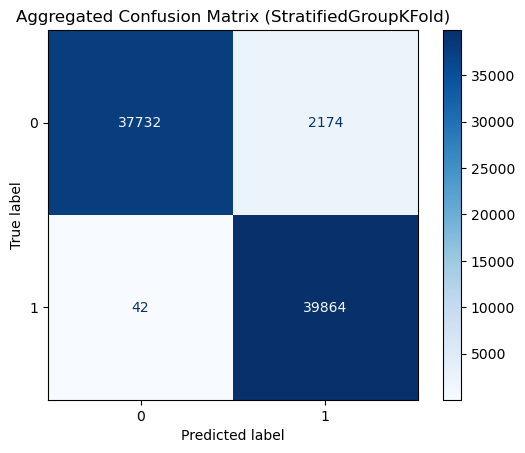

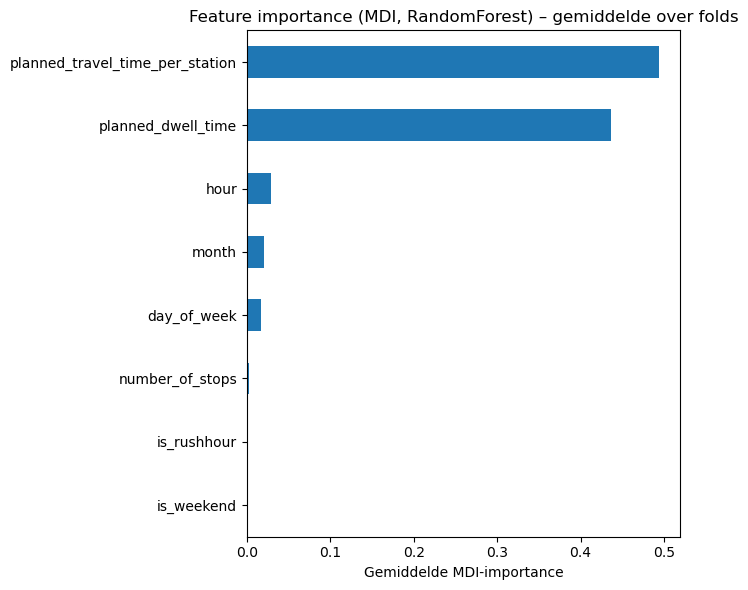

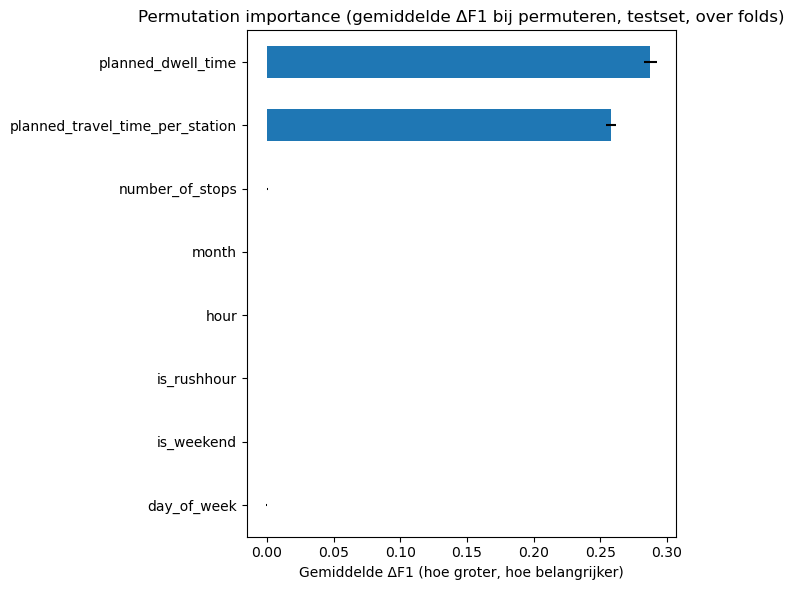

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.base import clone
import numpy as np

cv = StratifiedGroupKFold(n_splits=7, shuffle=True, random_state=42)

rf_model = RandomForestClassifier(
    class_weight="balanced"
)

unique_classes = np.array([0,1])
total_cm = np.zeros((2,2), dtype=int)

per_fold = []

mdi_list = []
perm_mean_list = []
perm_std_list = []

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y, groups=groups), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    train_groups = set(groups.iloc[train_idx])
    test_groups  = set(groups.iloc[test_idx])
    overlap = train_groups & test_groups

    if len(overlap) == 0:
        print(f"Good Fold {fold}: no overlap between train/test.")
    else:
        print(f"Bad Fold {fold}: {len(overlap)} overlapping services!")
        print("Example:", list(overlap)[:5])

    clf = clone(rf_model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred, labels=unique_classes)
    total_cm += cm
    report = classification_report(y_test, y_pred, target_names=["on time (0)", "delayed (1)"], output_dict=True)

    per_fold.append({
        "fold": fold,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision_0": report["on time (0)"]["precision"],
        "recall_0": report["on time (0)"]["recall"],
        "f1_0": report["on time (0)"]["f1-score"],
        "precision_1": report["delayed (1)"]["precision"],
        "recall_1": report["delayed (1)"]["recall"],
        "f1_1": report["delayed (1)"]["f1-score"],
        "macro_f1": report["macro avg"]["f1-score"]
    })

    mdi = pd.Series(clf.feature_importances_, index=X_train.columns, name=f"fold_{fold}")
    mdi_list.append(mdi)

    perm = permutation_importance(
        clf, X_test, y_test,
        scoring="f1",            # kies evt. "roc_auc" of "average_precision"
        n_repeats=5,
        random_state=42,
        n_jobs=-1
    )
    perm_mean = pd.Series(perm.importances_mean, index=X_test.columns, name=f"fold_{fold}")
    perm_std  = pd.Series(perm.importances_std,  index=X_test.columns, name=f"fold_{fold}")
    perm_mean_list.append(perm_mean)
    perm_std_list.append(perm_std)

cv_df = pd.DataFrame(per_fold)
print(cv_df.describe()[["accuracy", "precision_1", "recall_1", "f1_1", "macro_f1"]])

disp = ConfusionMatrixDisplay(confusion_matrix=total_cm, display_labels=unique_classes)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Aggregated Confusion Matrix (StratifiedGroupKFold)")
plt.show()

# Feature Importance
mdi_cv = pd.concat(mdi_list, axis=1).mean(axis=1).sort_values()
topN = 20
ax = mdi_cv.tail(topN).plot(kind="barh", figsize=(7, 6))
ax.set_title("Feature importance (MDI, RandomForest) – gemiddelde over folds")
ax.set_xlabel("Gemiddelde MDI-importance")
plt.tight_layout()
plt.show()

perm_mean_cv = pd.concat(perm_mean_list, axis=1).mean(axis=1)
perm_std_cv  = pd.concat(perm_std_list,  axis=1).mean(axis=1)  # gemiddelde std over folds
perm_mean_cv = perm_mean_cv.sort_values()

ax = perm_mean_cv.tail(topN).plot(
    kind="barh",
    xerr=perm_std_cv.reindex(perm_mean_cv.tail(topN).index),
    figsize=(7, 6)
)
ax.set_title("Permutation importance (gemiddelde ΔF1 bij permuteren, testset, over folds)")
ax.set_xlabel("Gemiddelde ΔF1 (hoe groter, hoe belangrijker)")
plt.tight_layout()
plt.show()

In [67]:
df_test = pd.read_parquet('Data/traject_Eindhoven_sittard_test_set_oktober_2025.parquet')
df_test.head()

,Service:RDT-ID,Service:Date,Service:Type,Service:Company,Service:Train number,Service:Completely cancelled,Service:Partly cancelled,Service:Maximum delay,Stop:RDT-ID,Stop:Station code,...,platform_change,partly_cancelled,completely_cancelled,departure_delay_start,arrival_delay_previous,max_delay_so_far,arrival_time,planned_dwell_time,planned_travel_time_per_station,is_delayed
0,16888678,2025-10-01,Intercity,NS,2919,False,False,2,152771015,EKZ,...,0,0,0,0.0,NaN,0.0,NaT,NaN,NaN,0
1,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771016,BKF,...,0,0,0,0.0,NaN,0.0,2025-10-01 03:13:00+00:00,0.0,4.0,0
2,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771017,BKG,...,0,0,0,0.0,0.0,0.0,2025-10-01 03:16:00+00:00,1.0,3.0,0
3,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771018,HKS,...,0,0,0,0.0,0.0,0.0,2025-10-01 03:21:00+00:00,1.0,4.0,0
4,16888678,2025-10-01,Intercity,NS,2919,False,False,0,152771019,HNK,...,0,0,0,0.0,0.0,0.0,2025-10-01 03:29:00+00:00,0.0,7.0,0


In [ ]:
from joblib import dump

final_model = RandomForestClassifier(
    class_weight="balanced"
)
1
final_model.fit(X, y)

feature_order = list(X.columns)

print(f"Final model trained on {len(X):,} rows and {X.shape[1]} features.")



In [66]:
df_balanced["planned_travel_time"]

0        NaN
1        NaN
2       -2.0
3       -1.0
4        NaN
        ... 
79807   -1.0
79808    NaN
79809    NaN
79810   -4.0
79811    0.0
Name: planned_travel_time, Length: 79812, dtype: float64

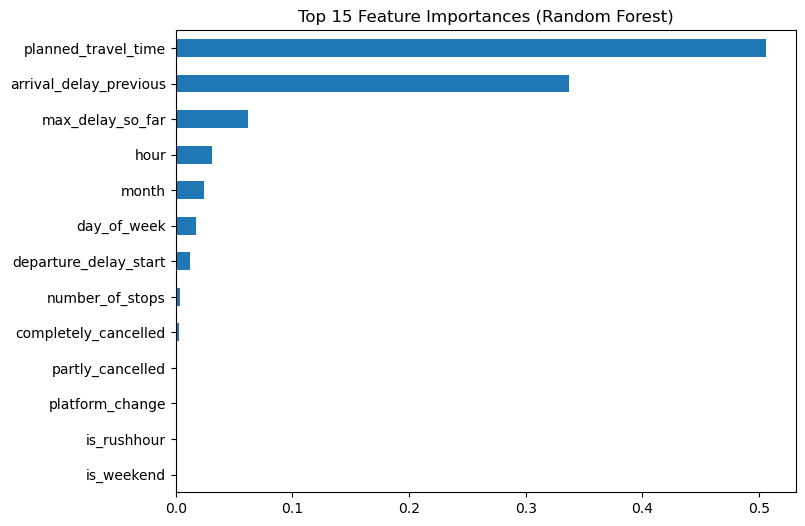

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values().tail(15).plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
features = [
    "planned_travel_time",
    "arrival_delay_previous",
    "max_delay_so_far",
    "hour",
    "month",
    "day_of_week",
    "departure_delay_start",
    "number_of_stops",
    "completely_cancelled",
    "partly_cancelled",
    "is_rushhour",
    "platform_change",
    "is_weekend"
]

fig, ax = plt.subplots(nrows=len(features), ncols=1, figsize=(12, 25))

display = PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=features,
    target=1,
    kind="individual",
    response_method="predict_proba",
    percentiles=(0.05, 0.95),
    grid_resolution=50,
    ax=ax
)
fig.suptitle("Partial Dependence Plots - Predicting Delay", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
PartialDependenceDisplay.from_estimator(
    model, X_train,
    features=[("planned_travel_time", "arrival_delay_previous")],
    target=1, response_method="predict_proba"
)